<a href="https://colab.research.google.com/github/gugyeoj1n/Natural_Language_Processing/blob/main/06_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf

w = tf.Variable(2)

def f(w) :
  return 2 * (w ** 2) + 5

with tf.GradientTape() as tape :
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>
[None]


In [23]:
w, b = tf.Variable(4.0), tf.Variable(1.0)

def hypothesis(x) :
  return w * x + b

def mse_loss(y_pred, y) :
  return tf.reduce_mean(tf.square(y_pred - y))

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [9, 23, 34, 42, 55, 66, 75, 84, 95]

optimizer = tf.optimizers.SGD(0.01)

for i in range(301) :
  with tf.GradientTape() as tape :
    y_pred = hypothesis(x)
    cost = mse_loss(y_pred, y)
    gradients = tape.gradient(cost, [w, b])
    optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 50 == 0 :
    print("epoch : {:3} | w : {:5.4f} | b : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w : 8.1400 | b : 1.653 | cost : 1355.111084
epoch :  50 | w : 10.4087 | b : 1.806 | cost : 2.151106
epoch : 100 | w : 10.4350 | b :  1.64 | cost : 2.094498
epoch : 150 | w : 10.4564 | b : 1.506 | cost : 2.056989
epoch : 200 | w : 10.4738 | b : 1.396 | cost : 2.032140
epoch : 250 | w : 10.4880 | b : 1.307 | cost : 2.015670
epoch : 300 | w : 10.4995 | b : 1.234 | cost : 2.004759


In [25]:
x_test = [3.5, 6.2, 8.8]

print(hypothesis(x_test).numpy())

[37.982643 66.33132  93.63006 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [9, 23, 34, 42, 55, 66, 75, 84, 95]

model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

sgd = optimizers.SGD(lr=0.01)

model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

model.fit(x, y, epochs=300)

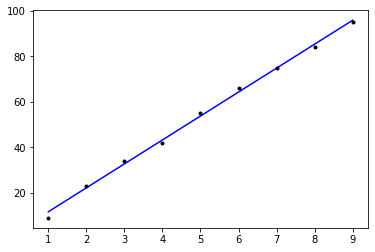

In [27]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')